## Exploratory Data Analysis of the Covid 19 Trials

In [1]:
# Import the reqiured Libraries:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### 1. Load the Dataset Covid Clinical Trials 

In [2]:
df = pd.read_csv('COVID clinical trials.csv')
df.head(2)

,Rank,NCT Number,Title,Acronym,Status,Study Results,Conditions,Interventions,Outcome Measures,Sponsor/Collaborators,...,Other IDs,Start Date,Primary Completion Date,Completion Date,First Posted,Results First Posted,Last Update Posted,Locations,Study Documents,URL
0,1,NCT04785898,Diagnostic Performance of the ID Now™ COVID-19...,COVID-IDNow,"Active, not recruiting",No Results Available,Covid19,Diagnostic Test: ID Now™ COVID-19 Screening Test,Evaluate the diagnostic performance of the ID ...,Groupe Hospitalier Paris Saint Joseph,...,COVID-IDNow,"November 9, 2020","December 22, 2020","April 30, 2021","March 8, 2021",NaN,"March 8, 2021","Groupe Hospitalier Paris Saint-Joseph, Paris, ...",NaN,https://ClinicalTrials.gov/show/NCT04785898
1,2,NCT04595136,Study to Evaluate the Efficacy of COVID19-0001...,COVID-19,Not yet recruiting,No Results Available,SARS-CoV-2 Infection,Drug: Drug COVID19-0001-USR|Drug: normal saline,Change on viral load results from baseline aft...,United Medical Specialties,...,COVID19-0001-USR,"November 2, 2020","December 15, 2020","January 29, 2021","October 20, 2020",NaN,"October 20, 2020","Cimedical, Barranquilla, Atlantico, Colombia",NaN,https://ClinicalTrials.gov/show/NCT04595136


In [3]:
# Find the shape of the dataset:
df.shape

(5783, 27)

In [4]:
# Find the Full information about the dataset:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5783 entries, 0 to 5782
Data columns (total 27 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Rank                     5783 non-null   int64  
 1   NCT Number               5783 non-null   object 
 2   Title                    5783 non-null   object 
 3   Acronym                  2480 non-null   object 
 4   Status                   5783 non-null   object 
 5   Study Results            5783 non-null   object 
 6   Conditions               5783 non-null   object 
 7   Interventions            4897 non-null   object 
 8   Outcome Measures         5748 non-null   object 
 9   Sponsor/Collaborators    5783 non-null   object 
 10  Gender                   5773 non-null   object 
 11  Age                      5783 non-null   object 
 12  Phases                   3322 non-null   object 
 13  Enrollment               5749 non-null   float64
 14  Funded Bys              

In [5]:
# Find the Numericals variables:
num_var = df.select_dtypes(include = ['int', 'float']).columns
print(num_var)

Index(['Rank', 'Enrollment'], dtype='object')


In [6]:
# Find the categorical variables:
cat_var = df.select_dtypes(include = ['object', 'category']).columns
print(cat_var)

Index(['NCT Number', 'Title', 'Acronym', 'Status', 'Study Results',
       'Conditions', 'Interventions', 'Outcome Measures',
       'Sponsor/Collaborators', 'Gender', 'Age', 'Phases', 'Funded Bys',
       'Study Type', 'Study Designs', 'Other IDs', 'Start Date',
       'Primary Completion Date', 'Completion Date', 'First Posted',
       'Results First Posted', 'Last Update Posted', 'Locations',
       'Study Documents', 'URL'],
      dtype='object')


In [7]:
# Find the Statistical summary of the numerical features:
df.describe()

,Rank,Enrollment
count,5783.000000,5.749000e+03
mean,2892.000000,1.831949e+04
std,1669.552635,4.045437e+05
min,1.000000,0.000000e+00
25%,1446.500000,6.000000e+01
50%,2892.000000,1.700000e+02
75%,4337.500000,5.600000e+02
max,5783.000000,2.000000e+07


In [8]:
# Find the Statistical summary of the categorical features:
df.describe(include=object)

,NCT Number,Title,Acronym,Status,Study Results,Conditions,Interventions,Outcome Measures,Sponsor/Collaborators,Gender,...,Other IDs,Start Date,Primary Completion Date,Completion Date,First Posted,Results First Posted,Last Update Posted,Locations,Study Documents,URL
count,5783,5783,2480,5783,5783,5783,4897,5748,5783,5773,...,5782,5749,5747,5747,5783,36,5783,5198,182,5783
unique,5783,5775,2338,12,2,3067,4337,5687,3631,3,...,5734,654,877,978,438,33,269,4255,182,5783
top,NCT04785898,Study Assessing Vagus Nerve Stimulation in CoV...,COVID-19,Recruiting,No Results Available,COVID-19,Other: No intervention,Mortality,Assistance Publique - Hôpitaux de Paris,All,...,COVID-19,"May 1, 2020","December 31, 2020","December 31, 2021","April 24, 2020","November 4, 2020","April 8, 2021","Uhmontpellier, Montpellier, France","""Statistical Analysis Plan"", https://ClinicalT...",https://ClinicalTrials.gov/show/NCT04785898
freq,1,2,47,2805,5747,720,32,5,78,5567,...,6,113,122,179,108,2,109,19,1,1


In [9]:
# Find the Missing Value or Null values in the Dataset:
df.isnull().sum()

Rank                          0
NCT Number                    0
Title                         0
Acronym                    3303
Status                        0
Study Results                 0
Conditions                    0
Interventions               886
Outcome Measures             35
Sponsor/Collaborators         0
Gender                       10
Age                           0
Phases                     2461
Enrollment                   34
Funded Bys                    0
Study Type                    0
Study Designs                35
Other IDs                     1
Start Date                   34
Primary Completion Date      36
Completion Date              36
First Posted                  0
Results First Posted       5747
Last Update Posted            0
Locations                   585
Study Documents            5601
URL                           0
dtype: int64

In [10]:
# Handling the Missing values by droping the columns having high numbers of missing quantity:
df.drop(columns=['Study Documents', 'Results First Posted'], inplace=True)

In [11]:
# Handling the misssing values by filling them with appropriate values:
df['Phases'].fillna('Not Applicable', inplace=True)
df['Gender'].fillna('All', inplace=True)
df['Age'].fillna('18 Years and older', inplace=True)
df['Funded Bys'].fillna('Other', inplace=True)
df['Acronym'].fillna('Not Applicable', inplace=True)
df['Outcome Measures'] = df['Outcome Measures'].fillna('Not reported')
df['Other IDs'] = df['Other IDs'].fillna('N/A')
df['Locations'] = df['Locations'].fillna('Not Specified')

C:\Users\age\AppData\Local\Temp\ipykernel_11940\4283439490.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Phases'].fillna('Not Applicable', inplace=True)
C:\Users\age\AppData\Local\Temp\ipykernel_11940\4283439490.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exam

In [12]:
df['Completion Date'].fillna('Unknown', inplace=True)
df['Primary Completion Date'].fillna('Unknown', inplace=True)
df['Interventions'].fillna('Unknown', inplace=True)
df['Study Designs'].fillna('Unknown', inplace=True)
df['Enrollment'].fillna('Unknown', inplace= True)

C:\Users\age\AppData\Local\Temp\ipykernel_11940\1260008305.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Completion Date'].fillna('Unknown', inplace=True)
C:\Users\age\AppData\Local\Temp\ipykernel_11940\1260008305.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For ex

In [13]:
# Checking missing values again:
df.isnull().sum()

Rank                        0
NCT Number                  0
Title                       0
Acronym                     0
Status                      0
Study Results               0
Conditions                  0
Interventions               0
Outcome Measures            0
Sponsor/Collaborators       0
Gender                      0
Age                         0
Phases                      0
Enrollment                  0
Funded Bys                  0
Study Type                  0
Study Designs               0
Other IDs                   0
Start Date                 34
Primary Completion Date     0
Completion Date             0
First Posted                0
Last Update Posted          0
Locations                   0
URL                         0
dtype: int64

In [14]:
# Extract a new feature country from locations:
countries = [str(df.Locations.iloc[i]).split(',')[-1] for i in range(df.shape[0])]
df['Country'] = countries
print(countries)

[' France', ' Colombia', ' San Marino', ' Hong Kong', ' France', ' Vietnam', ' United States', ' India', ' Israel', ' Chile', ' United States', ' Italy', ' United States', ' Italy', ' Israel', ' France', ' France', ' Hong Kong', ' Italy', ' United Kingdom', ' Italy', ' United Arab Emirates', ' France', ' Italy', ' Norway', ' Brazil', ' Italy', ' United States', ' France', ' France', ' Bangladesh', ' France', ' Denmark', ' Israel', ' Italy', 'Not Specified', ' Brazil', ' United States', ' France', ' Spain', ' United States', ' Switzerland', ' France', ' Brazil', ' Spain', 'Not Specified', ' Finland', ' Poland', ' Egypt', ' Denmark', ' Denmark', ' United Kingdom', ' United States', ' Turkey', ' Indonesia', ' Canada', 'Not Specified', ' Israel', ' Belgium', ' Pakistan', ' Turkey', ' United States', ' Sweden', ' United States', ' Turkey', ' Spain', ' Hungary', ' India', ' France', 'Not Specified', ' Turkey', ' Poland', ' Albania', ' Sudan', ' United States', ' United Arab Emirates', ' Swit

In [15]:
# Columns:
df.columns

Index(['Rank', 'NCT Number', 'Title', 'Acronym', 'Status', 'Study Results',
       'Conditions', 'Interventions', 'Outcome Measures',
       'Sponsor/Collaborators', 'Gender', 'Age', 'Phases', 'Enrollment',
       'Funded Bys', 'Study Type', 'Study Designs', 'Other IDs', 'Start Date',
       'Primary Completion Date', 'Completion Date', 'First Posted',
       'Last Update Posted', 'Locations', 'URL', 'Country'],
      dtype='object')

### 5. Univariate Analysis
#### Analyze each column individually to understand the distribution and key characteristics.

##### Status Distribution: Analyze the status of clinical trials (e.g., Completed, Ongoing).

C:\Users\age\AppData\Local\Temp\ipykernel_11940\1800572995.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y='Status', order=df['Status'].value_counts().index, palette='viridis')


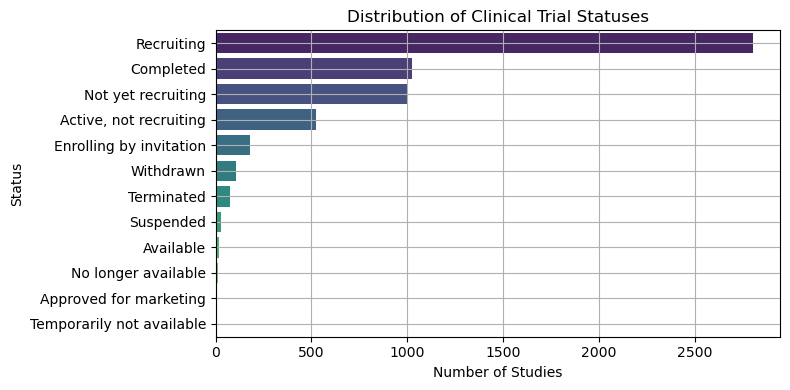

In [16]:
# Plot the distribution of study statuses
plt.figure(figsize=(8, 4))
sns.countplot(data=df, y='Status', order=df['Status'].value_counts().index, palette='viridis')
plt.title("Distribution of Clinical Trial Statuses")
plt.xlabel("Number of Studies")
plt.ylabel("Status")
plt.grid(True)
plt.tight_layout()
plt.show()

#####  ● Phase Distribution: Understand the distribution of trial phases.

C:\Users\age\AppData\Local\Temp\ipykernel_11940\3386776463.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y='Phases', order=df['Phases'].value_counts().index, palette='mako')


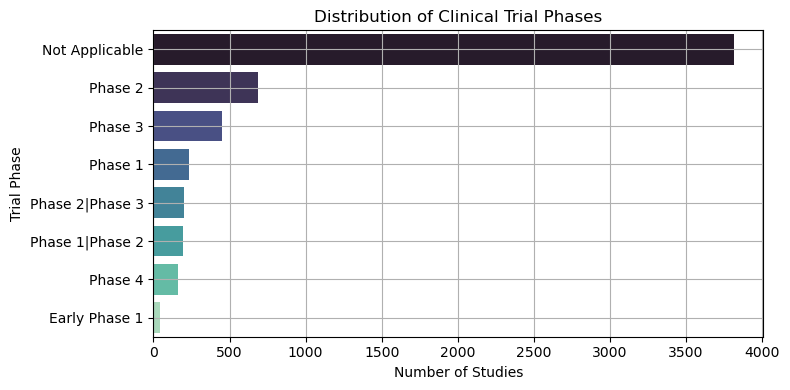

In [17]:
# Plot Phase distribution
plt.figure(figsize=(8, 4))
sns.countplot(data=df, y='Phases', order=df['Phases'].value_counts().index, palette='mako')
plt.title("Distribution of Clinical Trial Phases")
plt.xlabel("Number of Studies")
plt.ylabel("Trial Phase")
plt.grid(True)
plt.tight_layout()
plt.show()

#####  Age Group Analysis: Analyze the distribution of age groups

C:\Users\age\AppData\Local\Temp\ipykernel_11940\740012099.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y='Age', order=df['Age'].value_counts().head(10).index, palette='mako')


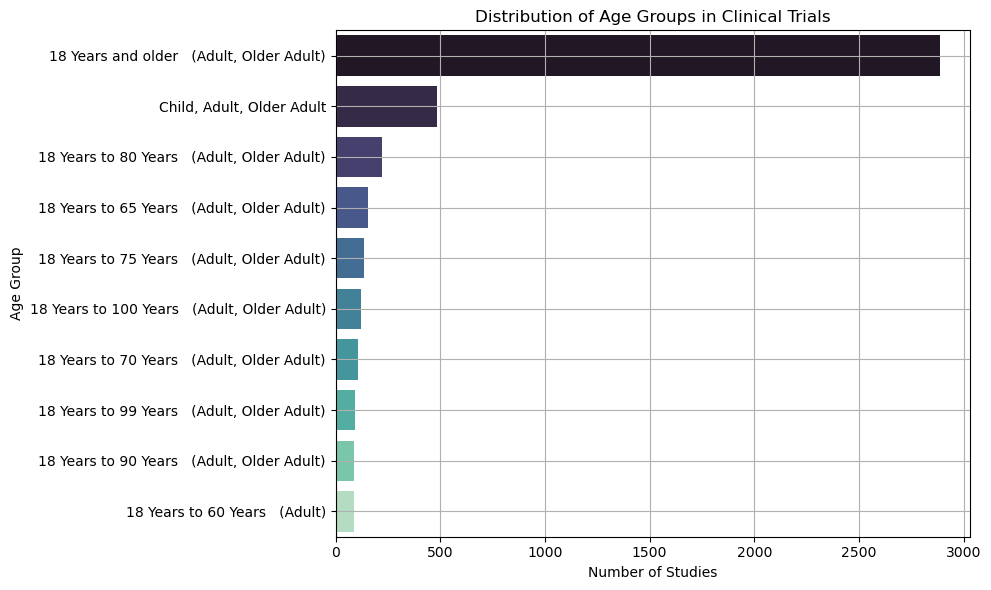

In [18]:
# Age Group Analysis
plt.figure(figsize=(10, 6))
sns.countplot(data=df, y='Age', order=df['Age'].value_counts().head(10).index, palette='mako')
plt.title("Distribution of Age Groups in Clinical Trials")
plt.xlabel("Number of Studies")
plt.ylabel("Age Group")
plt.grid(True)
plt.tight_layout()
plt.show()

###  6. Bivariate Analysis
#####  ● Status vs. Phases: Explore how trial phases are distributed across different statuses.

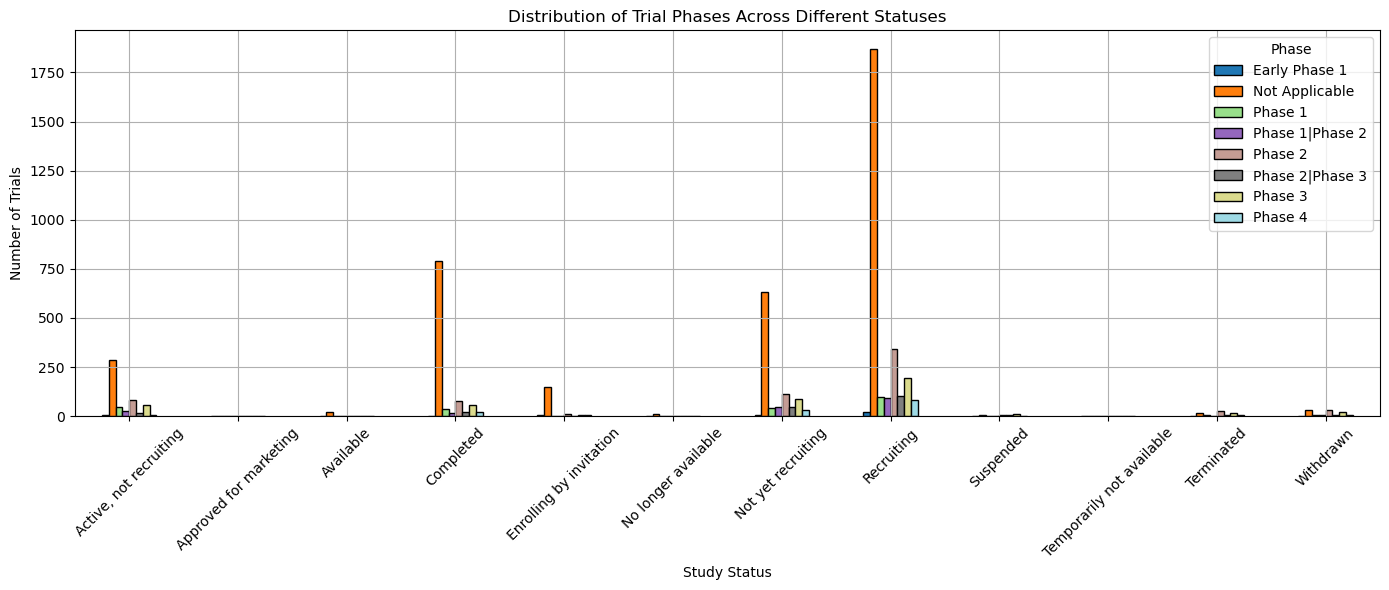

In [19]:
# Create a cross-tab (contingency table)
status_phase_ct = pd.crosstab(df['Status'], df['Phases'])

# Plot as a grouped bar chart
status_phase_ct.plot(kind='bar', figsize=(14, 6), colormap='tab20', edgecolor='black')
plt.title("Distribution of Trial Phases Across Different Statuses")
plt.xlabel("Study Status")
plt.ylabel("Number of Trials")
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(True)
plt.legend(title='Phase')
plt.show()

#####  ● Conditions vs. Outcome Measures: Understand the common outcome measures for different conditions:

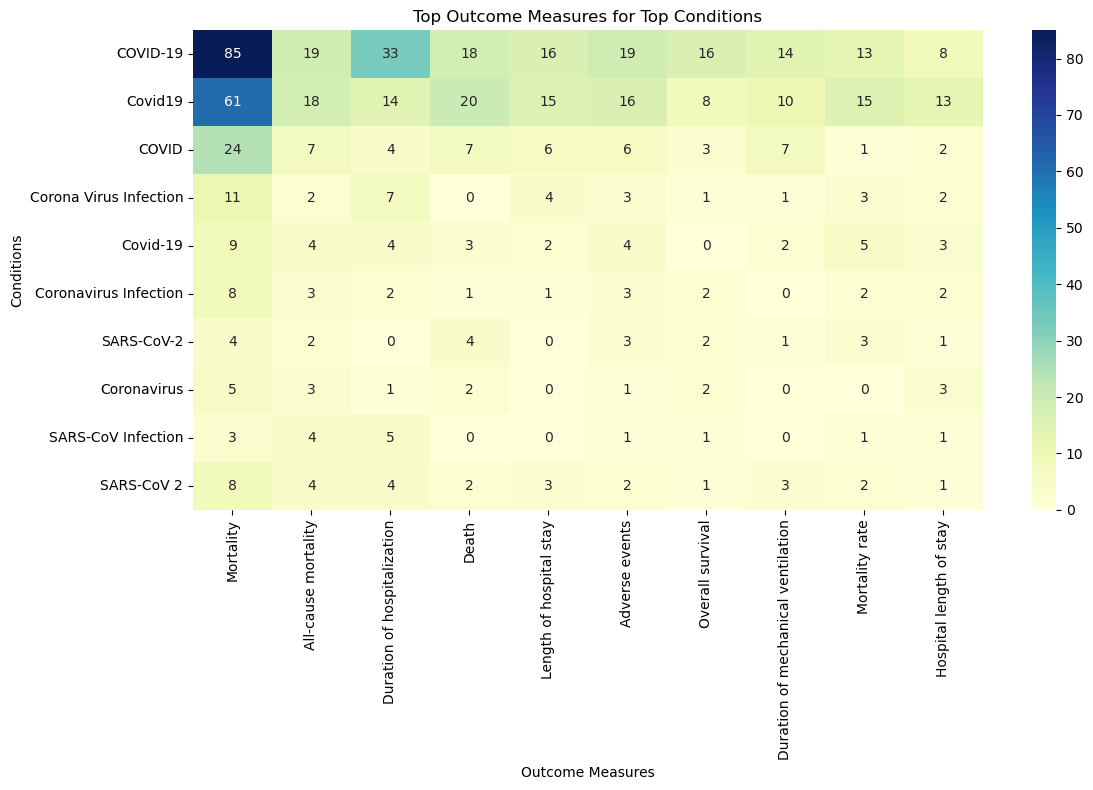

In [20]:
# Explode both columns (handle multiple entries separated by '|')
df['Conditions'] = df['Conditions'].str.split('|')
df['Outcome Measures'] = df['Outcome Measures'].str.split('|')

df_exploded = df.explode('Conditions')
df_exploded = df_exploded.explode('Outcome Measures')

# Strip whitespace
df_exploded['Conditions'] = df_exploded['Conditions'].str.strip()
df_exploded['Outcome Measures'] = df_exploded['Outcome Measures'].str.strip()

# Create cross-tabulation
cond_outcome_ct = pd.crosstab(df_exploded['Conditions'], df_exploded['Outcome Measures'])

# Display most frequent combinations as heatmap
top_conditions = cond_outcome_ct.sum(axis=1).sort_values(ascending=False).head(10).index
top_outcomes = cond_outcome_ct.sum(axis=0).sort_values(ascending=False).head(10).index

plt.figure(figsize=(12, 8))
sns.heatmap(cond_outcome_ct.loc[top_conditions, top_outcomes], annot=True, fmt="d", cmap="YlGnBu")
plt.title("Top Outcome Measures for Top Conditions")
plt.ylabel("Conditions")
plt.xlabel("Outcome Measures")
plt.tight_layout()
plt.show()

#### 7. Time Series Analysis
##### Analyze the trends over time, such as the number of trials started over the months

<Axes: title={'center': 'Trials Started Over Time'}, xlabel='Start Date'>

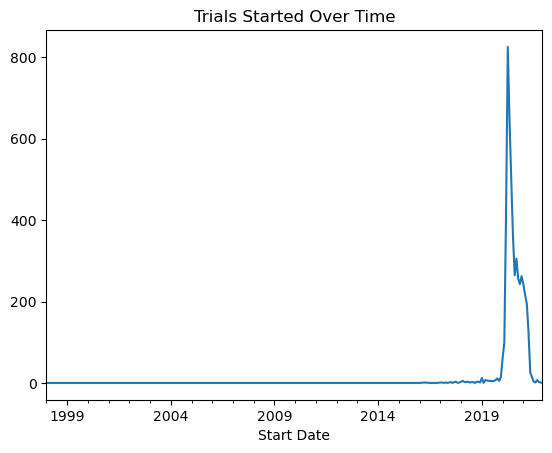

In [21]:
# Convert date columns to datetime
df['Start Date'] = pd.to_datetime(df['Start Date'],errors='coerce')
df['Primary Completion Date'] = pd.to_datetime(df['Primary Completion Date'], errors='coerce')

df['Start Date'].dt.to_period('M').value_counts().sort_index().plot(kind='line', title='Trials Started Over Time')

 ###                            ----------------------The project has been completed-----------------------